<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_03_PROBLEM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
# LeNet model

model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', strides = (1,1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), strides = (2, 2)))
model.add(layers.Conv2D(16, (5, 5), strides = (1,1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides = (2, 2)))
model.add(layers.Conv2D(120, (5, 5), activation='relu'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trai

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 11s 5ms/step - loss: 1.6419 - accuracy: 0.3966 - val_loss: 1.3882 - val_accuracy: 0.4953
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3601 - accuracy: 0.5091 - val_loss: 1.2846 - val_accuracy: 0.5340
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2528 - accuracy: 0.5530 - val_loss: 1.2664 - val_accuracy: 0.5414
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1801 - accuracy: 0.5810 - val_loss: 1.2570 - val_accuracy: 0.5512
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1287 - accuracy: 0.5985 - val_loss: 1.1874 - val_accuracy: 0.5785
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0785 - accuracy: 0.6178 - val_loss: 1.1666 - val_accuracy: 0.5830
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0410 - accuracy: 0.6325 - val_loss: 1.1234 - val_accuracy

In [8]:
learningrates_list = [0.001,0.01,0.1,1.0]

In [9]:
import keras

for i in range(len(learningrates_list)):
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model.compile(loss='mse', optimizer=optimizer)
    history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 8.3578 - val_loss: 6.8033
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 6.5785 - val_loss: 6.1457
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 5.9474 - val_loss: 5.8716
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 5.4746 - val_loss: 5.6772
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 5.1496 - val_loss: 5.2453
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.8590 - val_loss: 5.1915
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5927 - val_loss: 5.1658
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 4.4008 - val_loss: 5.1484
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 4.1320 - val_loss: 5.1857
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.951

**Problem 2.1**

**Effect of Learning rate:**

As the learning rate increases the loss also increases. Hence accuracy increases.

Also, I have got the best performance when learning rate is 0.001, compared to 0.01, 0.1, 1.0.





In [10]:
batchsize_list = [8, 16, 32, 64, 128]

In [11]:
import keras

for i in range(len(learningrates_list)):
    print('Result for ' + str(batchsize_list[i]))
    optimizer = keras.optimizers.Adam(lr = 0.001)
    model.compile(loss='mse', optimizer=optimizer)
    history = model.fit(train_images, train_labels, epochs = 25, batch_size = batchsize_list[i])

Result for 8
Epoch 1/25
6250/6250 [==============================] - 19s 3ms/step - loss: 8.2567
Epoch 2/25
6250/6250 [==============================] - 19s 3ms/step - loss: 8.2506
Epoch 3/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2509
Epoch 4/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2507
Epoch 5/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2506
Epoch 6/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2506
Epoch 7/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2506
Epoch 8/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2508
Epoch 9/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2508
Epoch 10/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2509
Epoch 11/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2506
Epoch 12/25
6250/6250 [==============================] - 18s 

In [ ]:
import keras

for i in range(len(learningrates_list)):
    for j in range(len(batchsize_list)):

        print('For learning rate' + str(learningrates_list[i]) + 'and batch size ' + str(batchsize_list[i]) + ':')
        optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
        model.compile(loss='mse', optimizer=optimizer)
        history = model.fit(train_images, train_labels, epochs = 25, batch_size = batchsize_list[i])

For learning rate0.001and batch size 8:
Epoch 1/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2508
Epoch 2/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2503
Epoch 3/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2508
Epoch 4/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2503
Epoch 5/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2505
Epoch 6/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2505
Epoch 7/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2502
Epoch 8/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2506
Epoch 9/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2505
Epoch 10/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2507
Epoch 11/25
6250/6250 [==============================] - 18s 3ms/step - loss: 8.2508
Epoch 12/25
6250/6250 [===========

**Problem 2.3**

We tried different hyperparameter, such as batch size and learning rate.

In [8]:
# Equivalent Feed Forward Network

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy:

**Problem 2.3**

I have compared different learning rates as well as different batch size. From the result, we can see that learning rate works well when the value of the learning rate is small. And, the batch size does not have any significant effect as far as the performance is concern.

1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.1000


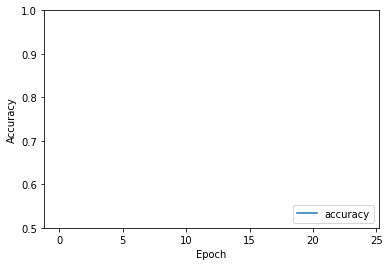

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_images, train_labels)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 6)                 18438     
                                                                 
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 dense_7 (Dense)             (None, 120)               2040      
                                                                 
 dense_8 (Dense)             (None, 84)                10164     
                                                                 
 dense_9 (Dense)             (None, 10)                850       
                                                                 
Total params: 31,604
Trainable params: 31,604
Non-trai

**Problem 2.4.a**

From the result, we can see that, the equvalent feed forward network is very poor based on its performance compared to LeNet.


**Problem 2.4.b**

From the model summary, we get-

i. Number of parameters in LeNet is 62,006.
ii. Number of parameters in Feed Forward Net is 31,604.

As you can see, Feed Forward Net is almost half the parameters in comparison with LeNet, but it is NOT worth it, as the result of Feed Forward Net is very poor compared to LeNet.